In [ ]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tarfile
import os

In [ ]:
#Connect to drive to access datasets
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Preprocessing

In [ ]:
#Extract images from compressed folder
file = tarfile.open('/content/drive/MyDrive/AAI511/MODULE4/Leaves.tar.bz2', 'r:bz2')
file.extractall('/content/drive/MyDrive/AAI511/MODULE4/EXTRACT')
file.close()

In [ ]:
#Create subfolders for classes and place images into corresponding folders
path = '/content/drive/MyDrive/AAI511/MODULE4/EXTRACT'

names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry','Chinese redbud',
         'true indigo','Japanese maple','Nanmu','castor aralia','Chinese cinnamon',
         'goldenrain tree','Big-fruited Holly','Japanese cheesewood','wintersweet',
         'camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree',
         'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry',
         'Glossy Privet','Chinese Toon','peach','Ford Woodlotus','trident maple',
         'Beales barberry','southern magnolia','Canadian poplar','Chinese tulip tree',
         'tangerine']

for i in names:
  os.mkdir(path+'/'+i)

def moving(a,b,z):
  for i in range(a, b):
    i = str(i)
    os.rename('/content/drive/MyDrive/AAI511/MODULE4/EXTRACT/Leaves/'+i+'.jpg','/content/drive/MyDrive/AAI511/MODULE4/EXTRACT/'+z+i+'.jpg')

moving(1060, 1123,'pubescent bamboo/')
moving(1001, 1060,'Chinese horse chestnut/')
moving(1552, 1617,'Anhui Barberry/')
moving(1123, 1195,'Chinese redbud/')
moving(1195, 1268,'true indigo/')
moving(1268, 1324,'Japanese maple/')
moving(1324, 1386,'Nanmu/')
moving(1386, 1438,'castor aralia/')
moving(1497, 1552,'Chinese cinnamon/')
moving(1438, 1497,'goldenrain tree/')
moving(2001, 2051,'Big-fruited Holly/')
moving(2051, 2114,'Japanese cheesewood/')
moving(2114, 2166,'wintersweet/')
moving(2166, 2231,'camphortree/')
moving(2231, 2291,'Japan Arrowwood/')
moving(2291, 2347,'sweet osmanthus/')
moving(2347, 2424,'deodar/')
moving(2424, 2486,'ginkgo, maidenhair tree/')
moving(2486, 2547,'Crape myrtle, Crepe myrtle/')
moving(2547, 2613,'oleander/')
moving(2616, 2676,'yew plum pine/')
moving(3001, 3056,'Japanese Flowering Cherry/')
moving(3056, 3111,'Glossy Privet/')
moving(3111, 3176,'Chinese Toon/')
moving(3176, 3230,'peach/')
moving(3230, 3282,'Ford Woodlotus/')
moving(3282, 3335,'trident maple/')
moving(3335, 3390,'Beales barberry/')
moving(3390, 3447,'southern magnolia/')
moving(3447, 3511,'Canadian poplar/')
moving(3511, 3564,'Chinese tulip tree/')
moving(3566, 3622,'tangerine/')

os.rmdir('/content/drive/MyDrive/AAI511/MODULE4/EXTRACT/Leaves')

In [ ]:
pip install split-folders

In [ ]:
#Split data into training, validation, and testing datasets
import splitfolders
output = '/content/drive/MyDrive/AAI511/MODULE4/Leaves_Datasets'

splitfolders.ratio(path, output=output, seed=42, ratio=(.7, .2, .1))

Copying files: 1907 files [00:52, 36.13 files/s]


In [ ]:
#Import datasets, convert to grayscale, and resize to (32,32)
train_dir = '/content/drive/MyDrive/AAI511/MODULE4/Leaves_Datasets/train'
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, labels="inferred",
                                                                 label_mode="categorical",color_mode='grayscale',
                                                                 image_size=(32, 32))
test_dir = '/content/drive/MyDrive/AAI511/MODULE4/Leaves_Datasets/test'
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, labels="inferred",
                                                                label_mode="categorical",color_mode='grayscale',
                                                                image_size=(32, 32))
val_dir = '/content/drive/MyDrive/AAI511/MODULE4/Leaves_Datasets/val'
val_data = tf.keras.utils.image_dataset_from_directory(val_dir, labels="inferred",
                                                               label_mode="categorical",color_mode='grayscale',
                                                               image_size=(32, 32))

Found 1323 files belonging to 32 classes.
Found 213 files belonging to 32 classes.
Found 371 files belonging to 32 classes.


#Model 1

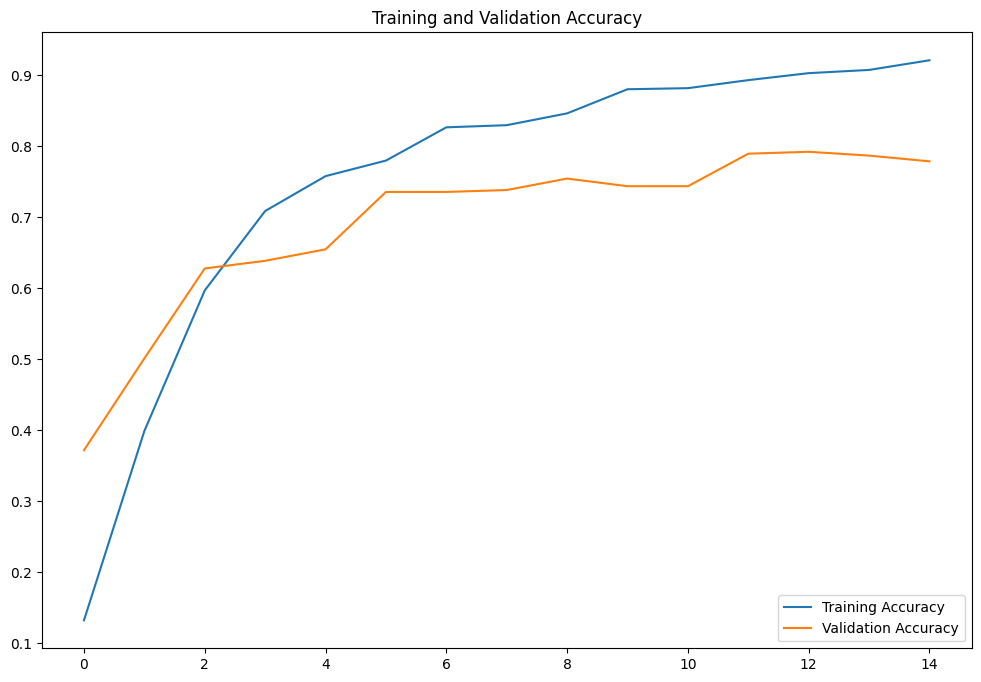

12/12 [==============================] - 3s 57ms/step - loss: 0.7209 - accuracy: 0.7790 - precision: 0.5053 - recall: 0.5175


[0.720871090888977, 0.7789757251739502, 0.5052631497383118, 0.5175201892852783]

In [ ]:
#Create model with 1 layer, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

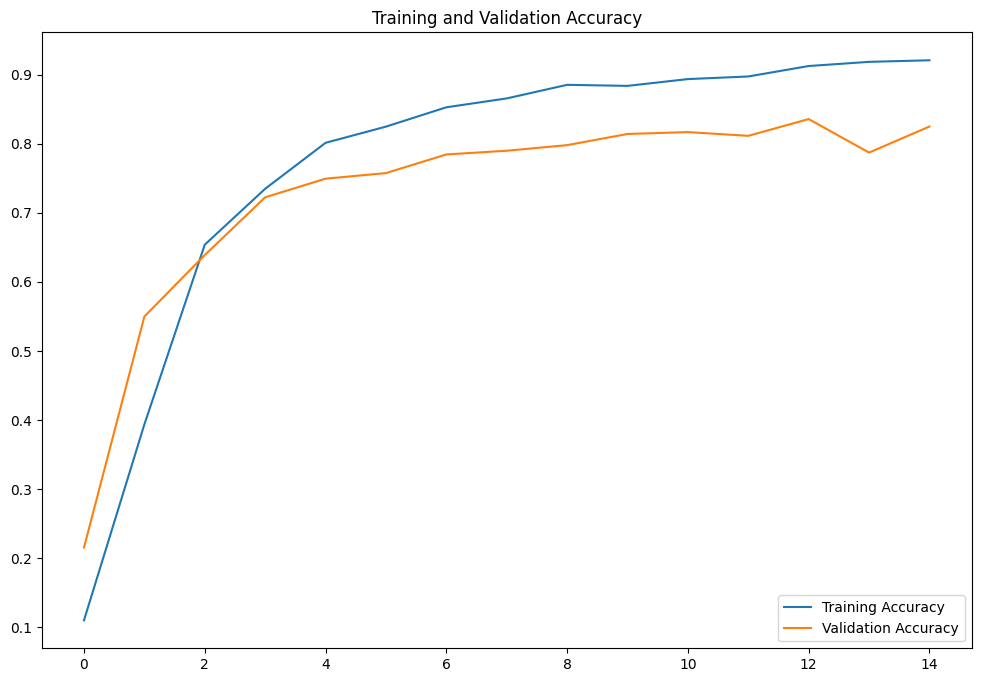

12/12 [==============================] - 3s 61ms/step - loss: 0.4935 - accuracy: 0.8248 - precision_1: 0.4258 - recall_1: 0.6496


[0.4934508502483368,
 0.8247978687286377,
 0.4257950484752655,
 0.6495956778526306]

In [ ]:
#Create model with 2 layers, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

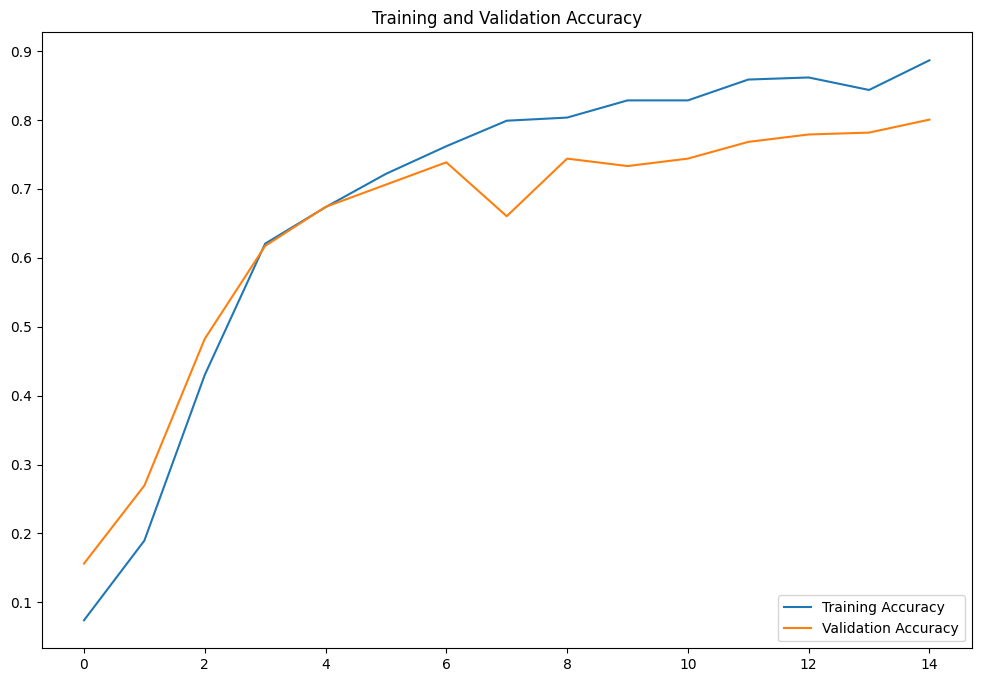

12/12 [==============================] - 3s 62ms/step - loss: 0.6372 - accuracy: 0.8005 - precision_2: 0.0928 - recall_2: 0.9946


[0.63715660572052, 0.8005390763282776, 0.09280683845281601, 0.9946091771125793]

In [ ]:
#Create model with 3 layers, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32) + \
    conv_2d_pooling_layers(64)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

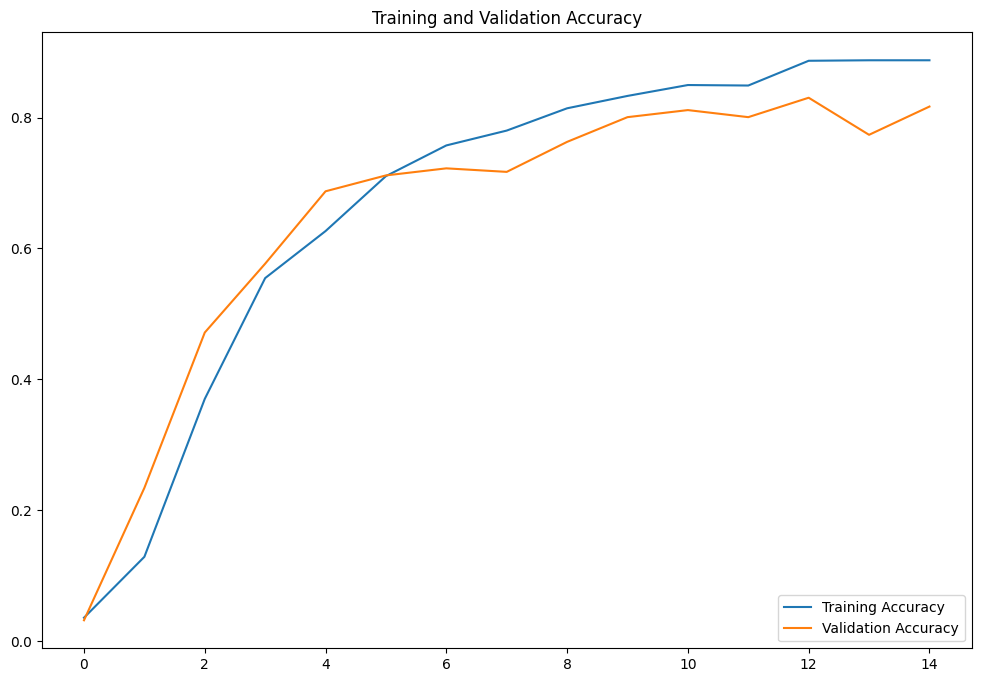

12/12 [==============================] - 3s 63ms/step - loss: 0.5896 - accuracy: 0.8167 - precision_3: 0.1167 - recall_3: 0.9946


[0.5896230340003967,
 0.8167116045951843,
 0.11669829487800598,
 0.9946091771125793]

In [ ]:
#Create model with 4 layers, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32) + \
    conv_2d_pooling_layers(64) + \
    conv_2d_pooling_layers(128)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

#Model 2

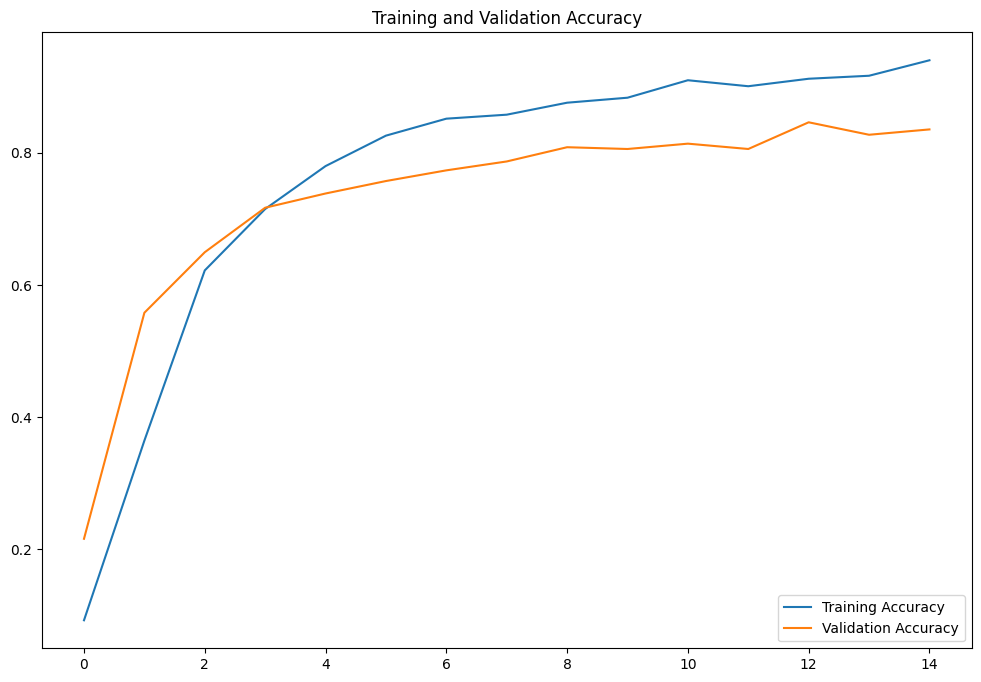

12/12 [==============================] - 3s 60ms/step - loss: 0.4964 - accuracy: 0.8356 - precision_4: 0.4265 - recall_4: 0.7116


[0.49644598364830017,
 0.835579514503479,
 0.4264943599700928,
 0.7115902900695801]

In [ ]:
#Create model with, compile with a 0.001 learning rate, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

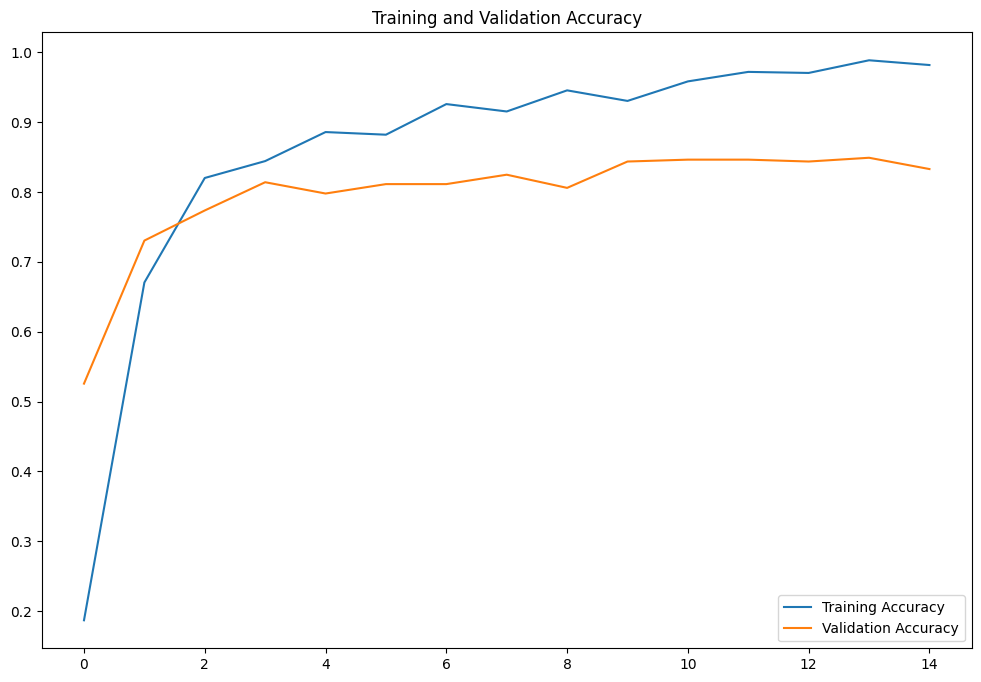

12/12 [==============================] - 3s 62ms/step - loss: 0.5650 - accuracy: 0.8329 - precision_5: 0.2821 - recall_5: 0.9407


[0.5650398135185242,
 0.8328840732574463,
 0.28213420510292053,
 0.9407008290290833]

In [ ]:
#Create model with, compile with a 0.01 learning rate, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

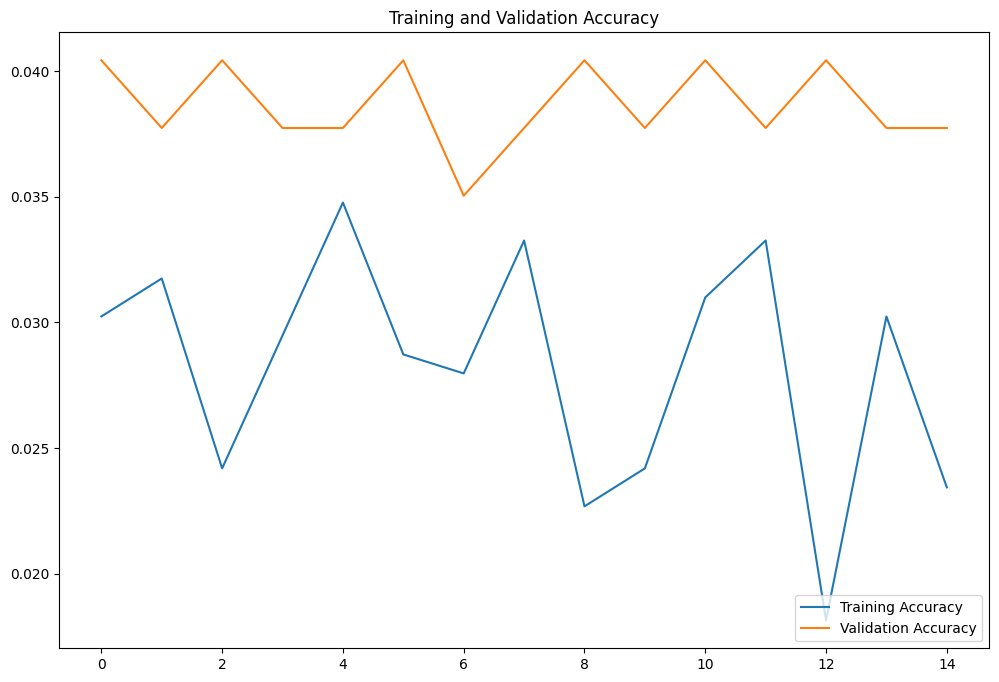

12/12 [==============================] - 3s 60ms/step - loss: 3.4642 - accuracy: 0.0377 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00


[3.4641528129577637, 0.03773584961891174, 0.0, 0.0]

In [ ]:
#Create model with, compile with a 0.1 learning rate, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32)
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

#Model 3

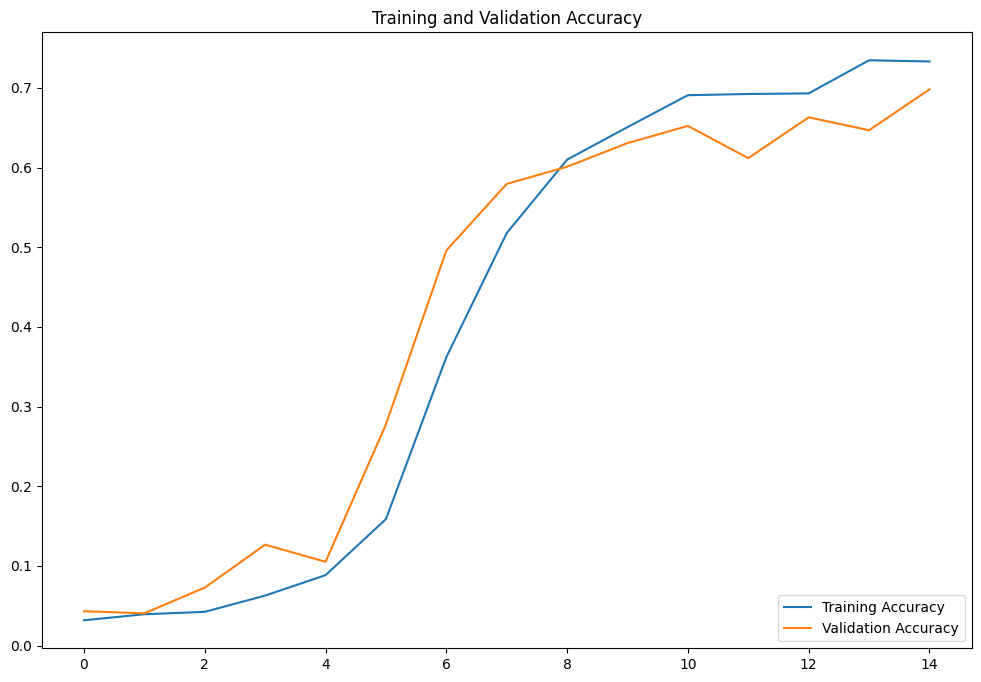

12/12 [==============================] - 3s 62ms/step - loss: 1.7660 - accuracy: 0.6981 - precision_7: 0.1133 - recall_7: 0.9704


[1.766008973121643, 0.698113203048706, 0.11331444978713989, 0.9703503847122192]

In [ ]:
#Create model with kernel regularization, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,kernel_regularizer='l1_l2')
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

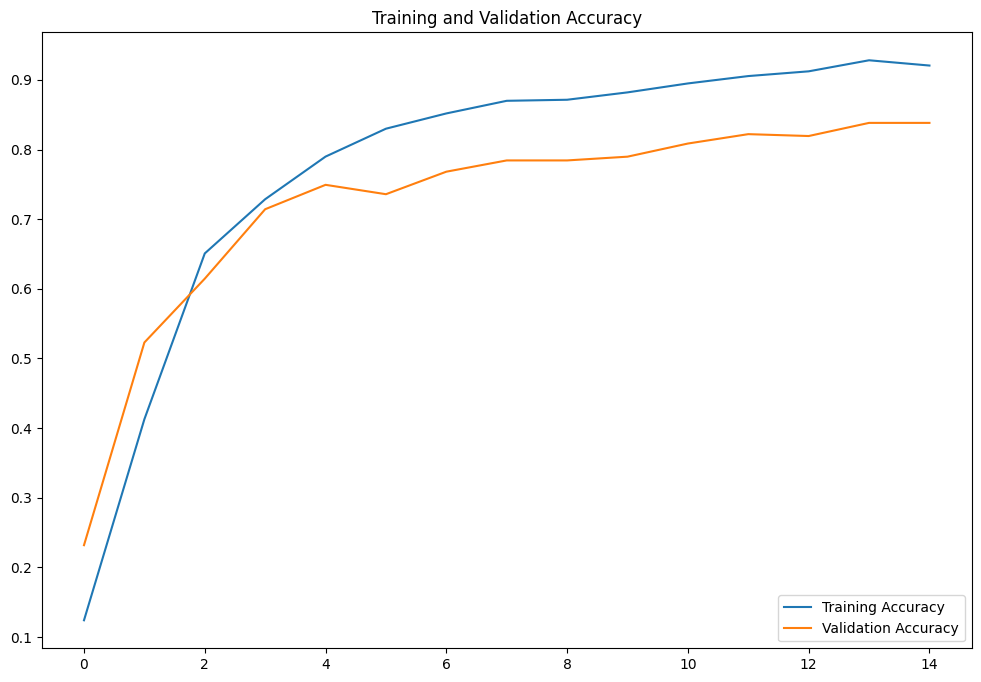

12/12 [==============================] - 3s 62ms/step - loss: 0.5199 - accuracy: 0.8383 - precision_8: 0.3821 - recall_8: 0.7251


[0.5199125409126282,
 0.8382749557495117,
 0.38210228085517883,
 0.7250673770904541]

In [ ]:
#Create model with bias regularization, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,bias_regularizer='l1_l2')
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

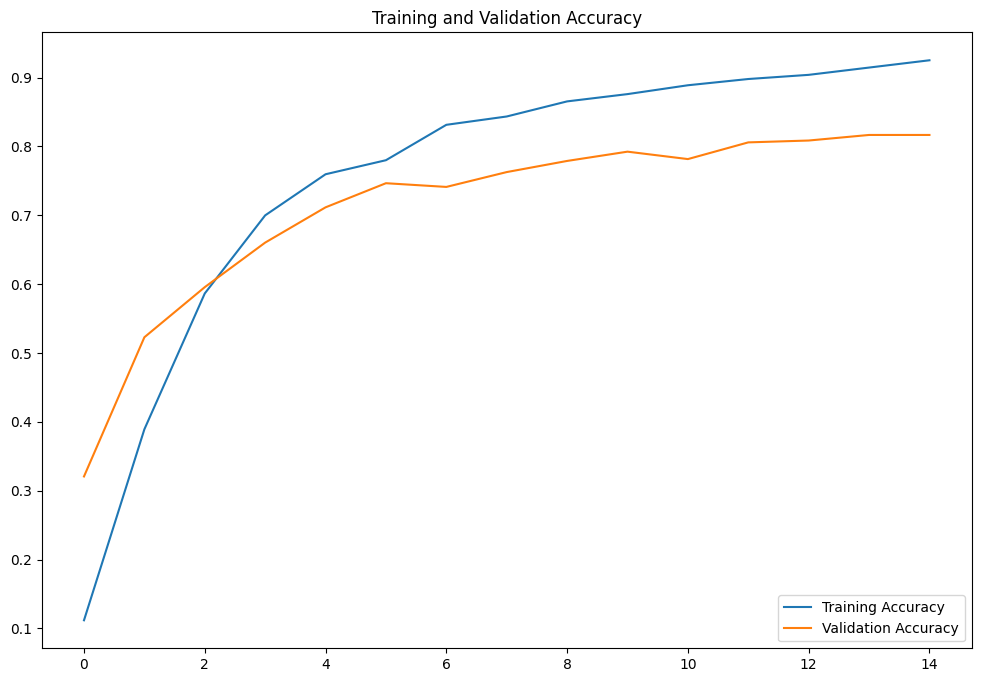

12/12 [==============================] - 3s 59ms/step - loss: 1.4865 - accuracy: 0.8167 - precision_9: 0.1542 - recall_9: 0.9865


[1.4864755868911743, 0.8167116045951843, 0.1542351394891739, 0.986522912979126]

In [ ]:
#Create model with activity regularization, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activity_regularizer='l1_l2')
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15, validation_data=val_data,verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

model.evaluate (val_data)

#Final Model

In [ ]:
##Create final model, compile, fit, and evaluate
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,1))
]

def conv_2d_pooling_layers(filters):
    return [
        tf.keras.layers.Conv2D(
            filters,
            kernel_size=(3,3),
            padding='same',
            activation='relu'
        ),
        tf.keras.layers.MaxPooling2D()
    ]

core_layers = \
    conv_2d_pooling_layers(16) + \
    conv_2d_pooling_layers(32)

dense_layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,bias_regularizer='l1_l2')
]

model = tf.keras.Sequential(
    preprocessing_layers +
    core_layers +
    dense_layers
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(train_data, epochs=15,verbose=2)

model.evaluate (test_data)